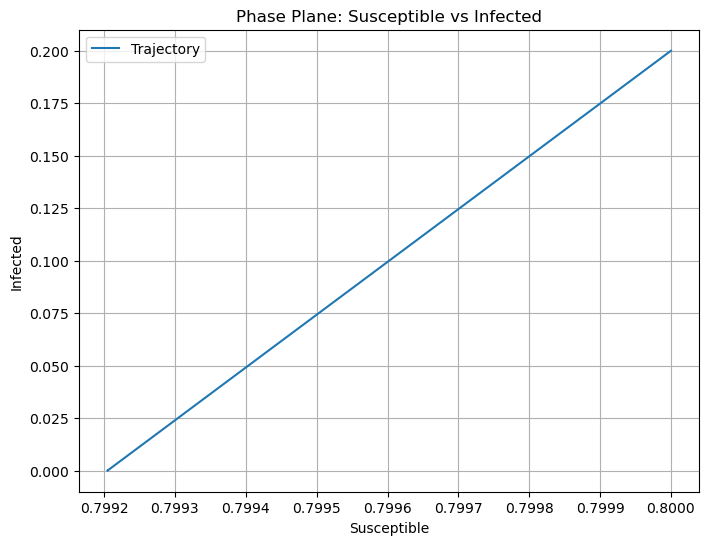

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations
def model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Set parameters
beta = 2.18e-3  # transmission coefficient
gamma = 0.44  # recovery rate

# Initial conditions
S0 = 0.8  # initial susceptible population
I0 = 0.2  # initial infected population
R0 = 0.0  # initial recovered population
y0 = [S0, I0, R0]

# Time grid
t = np.linspace(0, 100, 1000)

# Solve the differential equations
solution = odeint(model, y0, t, args=(beta, gamma))

# Plot the phase plane
plt.figure(figsize=(8, 6))
plt.plot(solution[:, 0], solution[:, 1], label='Trajectory')
plt.title('Phase Plane: Susceptible vs Infected')
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\ramam\AppData\Local\Temp\ipykernel_20896\1100707767.py:39: RuntimeWarning: invalid value encountered in scalar divide
  return dydt[1] / dydt[0], dydt[2] / dydt[0]
C:\Users\ramam\AppData\Local\Temp\ipykernel_20896\1100707767.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  return dydt[1] / dydt[0], dydt[2] / dydt[0]
C:\Users\ramam\AppData\Local\Temp\ipykernel_20896\1100707767.py:59: RuntimeWarning: invalid value encountered in divide
  slopes_normalized = slopes / np.sqrt(1 + slopes**2)


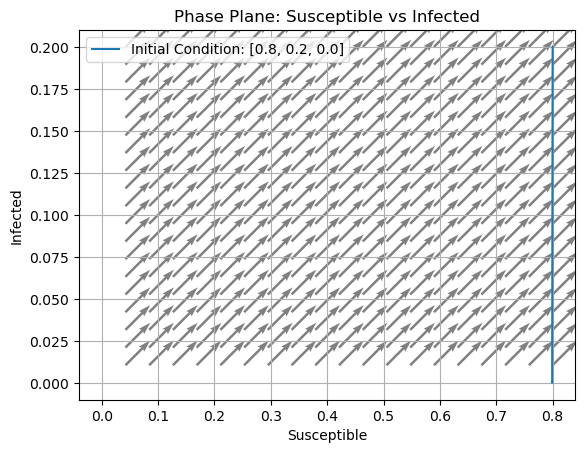

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Step 2: Define the given system in the form of lambdify generated function
def model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Step 6: Define the discrete-time space
t_interval = (0, 100)
t_values = np.linspace(t_interval[0], t_interval[1], 1000)

# Step 4: Create an array for various initial conditions
initial_conditions = [
    [0.8, 0.2, 0.0],
    # Add more initial conditions as needed
]

# Step 5: Define the discrete-time space
time_points = np.linspace(t_interval[0], t_interval[1], 1000)

# Step 6: for i from 1 to length of array in Step 4
for initial_condition in initial_conditions:
    # Step 6: solve_ivp
    solution = solve_ivp(
        model, t_interval, initial_condition, args=(2.18e-3, 0.44), t_eval=time_points
    )

    # Step 6: plot the solution trajectories
    plt.plot(solution.y[0], solution.y[1], label=f'Initial Condition: {initial_condition}')

# Step 7: Define a function containing the system of differential equations
def slope_function(t, y, beta, gamma):
    dydt = model(t, y, beta, gamma)
    return dydt[1] / dydt[0], dydt[2] / dydt[0]

# Step 8: Find the maximum value of the plotted trajectories
max_x = np.max(solution.y[0])
max_y = np.max(solution.y[1])

# Step 9: Create a discrete space for x and y
x_values = np.linspace(0, max_x, 20)
y_values = np.linspace(0, max_y, 20)

# Step 10: Create a meshgrid
x, y = np.meshgrid(x_values, y_values)

# Step 11: Find the slopes of functions
slopes = np.zeros_like(x)
for i in range(len(x_values)):
    for j in range(len(y_values)):
        slopes[j, i] = slope_function(0, [x_values[i], y_values[j], 0], 2.18e-3, 0.44)[0]

# Step 12: Normalize the obtained slope points
slopes_normalized = slopes / np.sqrt(1 + slopes**2)

# Step 13: Plot the direction field
plt.quiver(x, y, 1, slopes_normalized, scale=20, color='gray', width=0.005)

# Finalize the plot
plt.title('Phase Plane: Susceptible vs Infected')
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.grid(True)
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for /: 'list' and 'int'

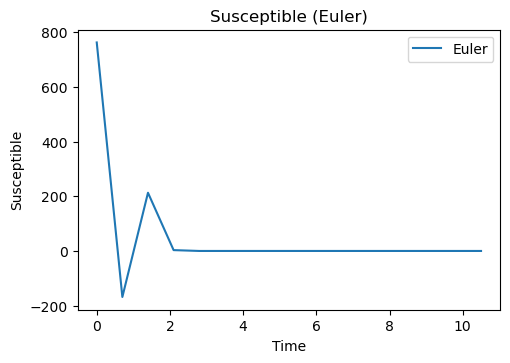

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Given parameters
beta = 2.18e-3  # transmission coefficient
gamma = 0.44  # recovery rate

# Initial conditions
S0 = 762
I0 = 800
R0 = 0
y0 = [S0, I0, R0]

# Time interval and step size
t_interval = [0, 10.5]
step_size = 0.7
t_values = np.arange(t_interval[0], t_interval[1] + step_size, step_size)

# Define the system of differential equations
def model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Solve using Euler's method
def euler_method(model, y0, t_values, args):
    y = np.zeros((len(t_values), len(y0)))
    y[0] = y0
    for i in range(1, len(t_values)):
        dt = t_values[i] - t_values[i-1]
        dy = model(y[i-1], t_values[i-1], *args)
        y[i] = y[i-1] + np.multiply(dy, dt)
    return y

# Solve using RK-2 method
def rk2_method(model, y0, t_values, args):
    y = np.zeros((len(t_values), len(y0)))
    y[0] = y0
    for i in range(1, len(t_values)):
        dt = t_values[i] - t_values[i-1]
        k1 = model(y[i-1], t_values[i-1], *args)
        k2 = model(y[i-1] + np.multiply(k1, dt), t_values[i], *args)
        y[i] = y[i-1] + np.multiply((k1 + k2) / 2, dt)
    return y

# Solve using RK-4 method
def rk4_method(model, y0, t_values, args):
    y = np.zeros((len(t_values), len(y0)))
    y[0] = y0
    for i in range(1, len(t_values)):
        dt = t_values[i] - t_values[i-1]
        k1 = model(y[i-1], t_values[i-1], *args)
        k2 = model(y[i-1] + np.multiply(k1, dt/2), t_values[i-1] + dt/2, *args)
        k3 = model(y[i-1] + np.multiply(k2, dt/2), t_values[i-1] + dt/2, *args)
        k4 = model(y[i-1] + np.multiply(k3, dt), t_values[i], *args)
        y[i] = y[i-1] + np.multiply((k1 + 2*k2 + 2*k3 + k4) / 6, dt)
    return y

# Solve using odeint (ODE45)
ode45_solution = odeint(model, y0, t_values, args=(beta, gamma))

# Plot the solutions
plt.figure(figsize=(12, 8))

# Add Euler's method plot
euler_solution = euler_method(model, y0, t_values, (beta, gamma))
plt.subplot(2, 2, 1)
plt.plot(t_values, euler_solution[:, 0], label='Euler')
plt.title('Susceptible (Euler)')
plt.xlabel('Time')
plt.ylabel('Susceptible')
plt.legend()

# Add RK-2 method plot
rk2_solution = rk2_method(model, y0, t_values, (beta, gamma))
plt.subplot(2, 2, 2)
plt.plot(t_values, rk2_solution[:, 0], label='RK-2')
plt.title('Susceptible (RK-2)')
plt.xlabel('Time')
plt.ylabel('Susceptible')
plt.legend()

# Add RK-4 method plot
rk4_solution = rk4_method(model, y0, t_values, (beta, gamma))
plt.subplot(2, 2, 3)
plt.plot(t_values, rk4_solution[:, 0], label='RK-4')
plt.title('Susceptible (RK-4)')
plt.xlabel('Time')
plt.ylabel('Susceptible')
plt.legend()

# Add ODE45 method plot
plt.subplot(2, 2, 4)
plt.plot(t_values, ode45_solution[:, 0], label='ODE45')
plt.title('Susceptible (ODE45)')
plt.xlabel('Time')
plt.ylabel('Susceptible')
plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


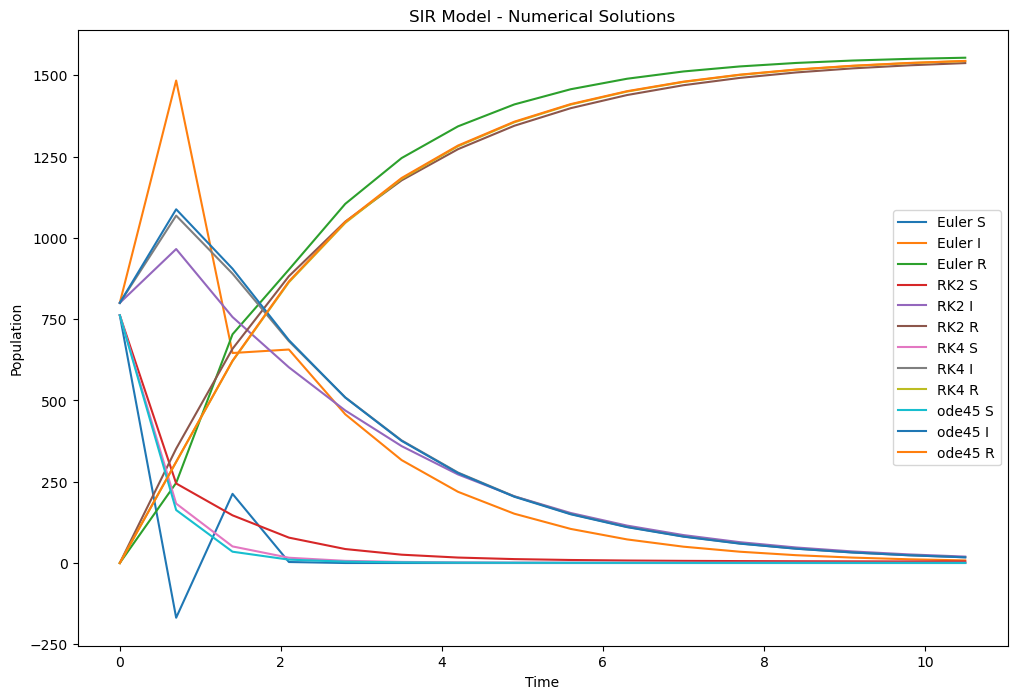

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
beta = 2.18e-3  # Transmission coefficient
gamma = 0.44    # Recovery rate
t_span = (0, 10.5)
step_size = 0.7
t_eval = np.arange(t_span[0], t_span[1] + step_size, step_size)
S0, I0, R0 = 762, 800, 0  # Initial conditions

# System of ODEs
def sir_model(t, y):
    S, I, R = y
    return [-beta * S * I, beta * S * I - gamma * I, gamma * I]

# Euler Method
def euler_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        y[:, i] = y[:, i-1] + step_size * np.array(func(t[i-1], y[:, i-1]))
    return y

# RK-2 Method
def rk2_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = step_size * np.array(func(t[i-1], y[:, i-1]))
        k2 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k1/2))
        y[:, i] = y[:, i-1] + k2
    return y

# RK-4 Method
def rk4_method(func, t, y0):
    y = np.zeros((len(y0), len(t)))
    y[:, 0] = y0
    for i in range(1, len(t)):
        k1 = step_size * np.array(func(t[i-1], y[:, i-1]))
        k2 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k1/2))
        k3 = step_size * np.array(func(t[i-1] + step_size/2, y[:, i-1] + k2/2))
        k4 = step_size * np.array(func(t[i-1] + step_size, y[:, i-1] + k3))
        y[:, i] = y[:, i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

# Solve using Euler, RK2, RK4, and ode45 (RK45 in scipy)
y_euler = euler_method(sir_model, t_eval, [S0, I0, R0])
y_rk2 = rk2_method(sir_model, t_eval, [S0, I0, R0])
y_rk4 = rk4_method(sir_model, t_eval, [S0, I0, R0])
sol_ode45 = solve_ivp(sir_model, t_span, [S0, I0, R0], method='RK45', t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(t_eval, y_euler[0], label='Euler S')
plt.plot(t_eval, y_euler[1], label='Euler I')
plt.plot(t_eval, y_euler[2], label='Euler R')

plt.plot(t_eval, y_rk2[0], label='RK2 S')
plt.plot(t_eval, y_rk2[1], label='RK2 I')
plt.plot(t_eval, y_rk2[2], label='RK2 R')

plt.plot(t_eval, y_rk4[0], label='RK4 S')
plt.plot(t_eval, y_rk4[1], label='RK4 I')
plt.plot(t_eval, y_rk4[2], label='RK4 R')

plt.plot(sol_ode45.t, sol_ode45.y[0], label='ode45 S')
plt.plot(sol_ode45.t, sol_ode45.y[1], label='ode45 I')
plt.plot(sol_ode45.t, sol_ode45.y[2], label='ode45 R')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SIR Model - Numerical Solutions')
plt.legend()
plt.show()

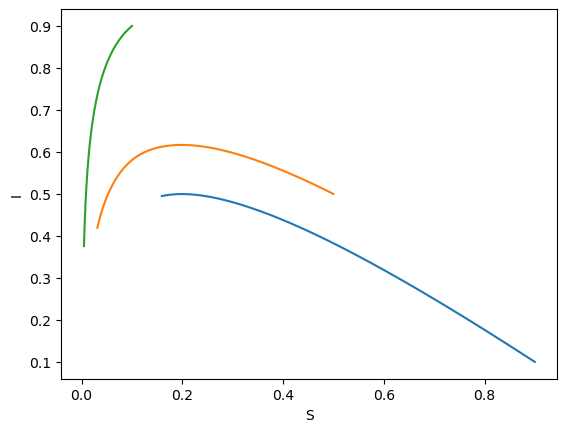

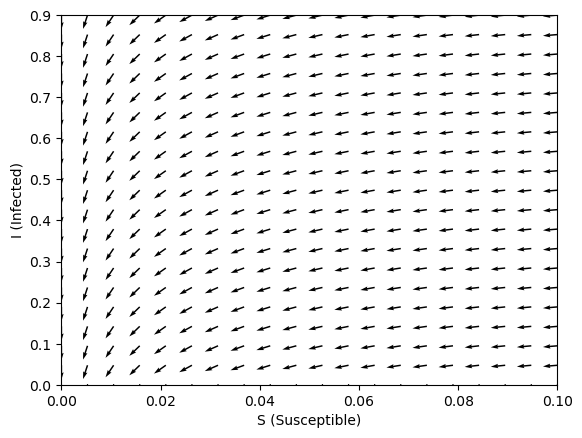

In [4]:
import numpy as np
import sympy as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

beta, gamma, S, I = sp.symbols('beta gamma S I')
dS_dt = -beta * S * I
dI_dt = beta * S * I - gamma * I
dR_dt = gamma * I

# Convert to a numerical function
f = sp.lambdify((S, I, beta, gamma), [dS_dt, dI_dt])


t_span = [0, 10]  # Time interval, e.g., from 0 to 10 days

beta_value = 0.5
gamma_value = 0.1
initial_conditions = np.array([[0.9, 0.1], [0.5, 0.5], [0.1, 0.9]])
t_eval = np.linspace(t_span[0], t_span[1], 300)

for S0, I0 in initial_conditions:
    sol = solve_ivp(lambda t, y: f(y[0], y[1], beta_value, gamma_value),
                    t_span, [S0, I0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1])
plt.xlabel('S')
plt.ylabel('I')
plt.show()

def system(t, y):
    return f(y[0], y[1], beta_value, gamma_value)


S_max = max([max(sol.y[0]) for S0, I0 in initial_conditions])
I_max = max([max(sol.y[1]) for S0, I0 in initial_conditions])

x = np.linspace(0, S_max, 20)
y = np.linspace(0, I_max, 20)
X, Y = np.meshgrid(x, y)
U, V = np.zeros(X.shape), np.zeros(Y.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        slopes = system(0, [X[i, j], Y[i, j]])
        U[i, j], V[i, j] = slopes


for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        norm = np.sqrt(U[i, j]**2 + V[i, j]**2)
        if norm != 0:
            U[i, j], V[i, j] = U[i, j] / norm, V[i, j] / norm

plt.quiver(X, Y, U, V, angles='xy')
plt.xlim([0, S_max])
plt.ylim([0, I_max])
plt.xlabel('S (Susceptible)')
plt.ylabel('I (Infected)')
plt.show()